# Matched Filter

In [1]:
import numpy as np

import matplotlib.pyplot as plt
#from matplotlib import cm
%matplotlib inline
plt.rcParams['font.size'] = '12'

Text(0.5, 1.0, 'Barker code (N = 13)')

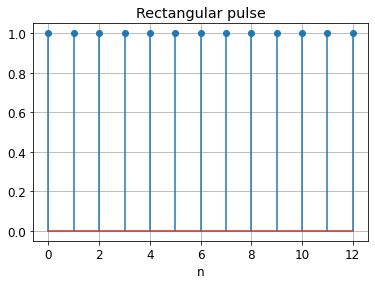

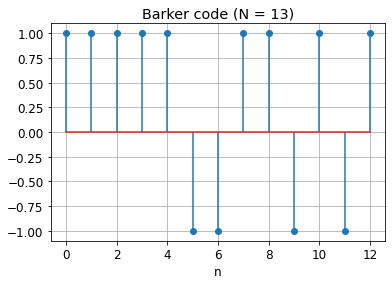

In [2]:
# Definiendo las señales
N = 13
A = 1
s1 = A*np.ones(N)
s2 = A*np.array([+1,+1,+1,+1,+1,-1,-1,+1,+1,-1,+1,-1,+1])

plt.figure()
plt.stem(s1)
plt.xlabel('n')
plt.grid('on')
plt.title('Rectangular pulse')

plt.figure()
plt.stem(s2)
plt.xlabel('n')
plt.grid('on')
plt.title('Barker code (N = 13)')


Text(0.5, 1.0, 'Barker code + noise')

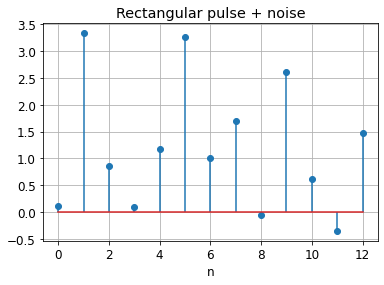

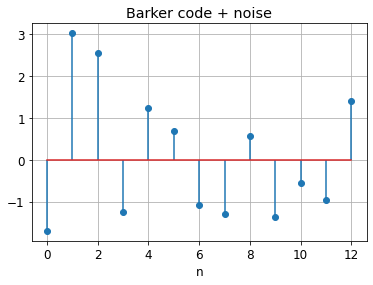

In [3]:
# Simulando señales con ruido
M = 10000
sigma2 = 2
sigma = np.sqrt(sigma2)

x1H0 = sigma*np.random.randn(N,M)
x2H0 = sigma*np.random.randn(N,M)

x1H1 = sigma*np.random.randn(N,M)
x2H1 = sigma*np.random.randn(N,M)

for m in range(M):
    x1H1[:,m] += s1
    x2H1[:,m] += s2

plt.figure()
plt.stem(x1H1[:,0])
plt.xlabel('n')
plt.grid('on')
plt.title('Rectangular pulse + noise')

plt.figure()
plt.stem(x2H1[:,0])
plt.xlabel('n')
plt.grid('on')
plt.title('Barker code + noise')


Text(0.5, 1.0, 'Barker code + noise')

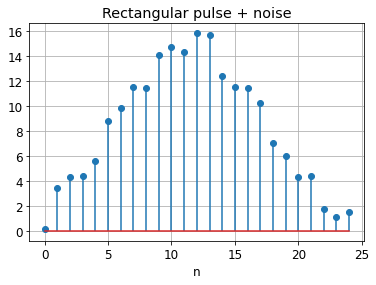

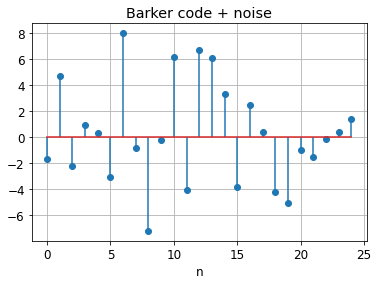

In [4]:
# Matched filter - Convolving

xs1H0 = np.zeros([2*N-1,M])
xs2H0 = np.zeros([2*N-1,M])

xs1H1 = np.zeros([2*N-1,M])
xs2H1 = np.zeros([2*N-1,M])

for m in range(M):
    xs1H0[:,m] = np.convolve(x1H0[:,m],s1[::-1])
    xs2H0[:,m] = np.convolve(x2H0[:,m],s2[::-1])
    xs1H1[:,m] = np.convolve(x1H1[:,m],s1[::-1])
    xs2H1[:,m] = np.convolve(x2H1[:,m],s2[::-1])

plt.figure()
plt.stem(xs1H1[:,0])
plt.xlabel('n')
plt.grid('on')
plt.title('Rectangular pulse + noise')

plt.figure()
plt.stem(xs2H1[:,0])
plt.xlabel('n')
plt.grid('on')
plt.title('Barker code + noise')


Text(0.5, 1.0, 'Matched filter - Barker 13')

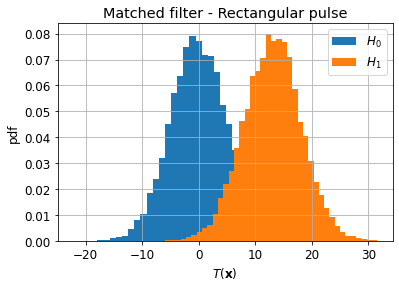

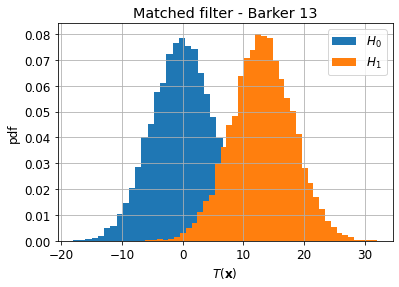

In [5]:
# Aplicando el detector
gamma = N/2
T1_H0 = xs1H0[N-1,:]
T2_H0 = xs2H0[N-1,:]

T1_H1 = xs1H1[N-1,:]
T2_H1 = xs2H1[N-1,:]

plt.figure()
plt.hist(T1_H0,bins=40,density=True)
plt.hist(T1_H1,bins=40,density=True)
plt.grid('on')
plt.xlabel('$T(\mathbf{x})$')
plt.ylabel('pdf')
plt.legend(['$H_0$','$H_1$'])
plt.title('Matched filter - Rectangular pulse')

plt.figure()
plt.hist(T2_H0,bins=40,density=True)
plt.hist(T2_H1,bins=40,density=True)
plt.grid('on')
plt.xlabel('$T(\mathbf{x})$')
plt.ylabel('pdf')
plt.legend(['$H_0$','$H_1$'])
plt.title('Matched filter - Barker 13')



[[8920. 1080.]
 [ 984. 9016.]]
[[8997. 1003.]
 [ 939. 9061.]]


Text(0, 0.5, 'True')

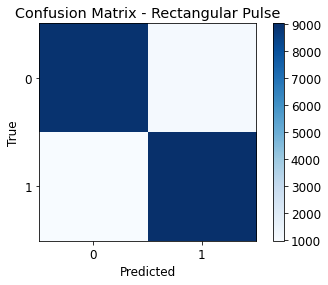

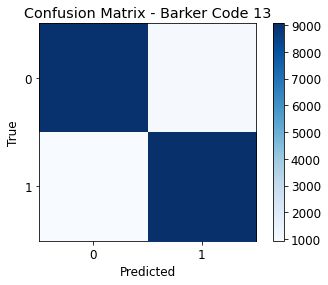

In [6]:
conf_matrix1 = np.zeros([2,2])
conf_matrix2 = np.zeros([2,2])

# Verdaderos negativos
conf_matrix1[0,0] = np.sum(T1_H0<gamma)
conf_matrix2[0,0] = np.sum(T2_H0<gamma)
# Falsos positivos (Falsa alarma)
conf_matrix1[0,1] = np.sum(T1_H0>=gamma)
conf_matrix2[0,1] = np.sum(T2_H0>=gamma)
# Falsos negativos (Detección fallida)
conf_matrix1[1,0] = np.sum(T1_H1<gamma)
conf_matrix2[1,0] = np.sum(T2_H1<gamma)
# Verdadero positivos (Detección correcta)
conf_matrix1[1,1] = np.sum(T1_H1>=gamma)
conf_matrix2[1,1] = np.sum(T2_H1>=gamma)

print(conf_matrix1)
print(conf_matrix2)

plt.figure()
plt.imshow(conf_matrix1,cmap=plt.cm.Blues)
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
plt.title('Confusion Matrix - Rectangular Pulse')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.figure()
plt.imshow(conf_matrix2,cmap=plt.cm.Blues)
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
plt.title('Confusion Matrix - Barker Code 13')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(0, 0.5, 'Prob of detection')

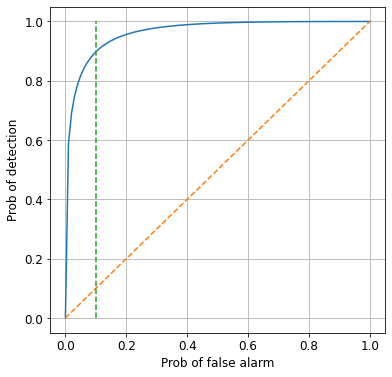

In [7]:
# Graficando ROC

import scipy.stats as stats

P_FA = np.linspace(0,1,101)
T = stats.norm.isf(P_FA,loc=0,scale=1)
E = N*A**2
SNR = E/sigma2

P_FA_gamma = stats.norm.sf(gamma/np.sqrt(sigma2*E),loc=0,scale=1)
P_D = stats.norm.sf(T-np.sqrt(SNR),loc=0,scale=1)

plt.figure(figsize=[6,6])
plt.plot(P_FA,P_D)
plt.plot(P_FA,P_FA,'--')

plt.plot([P_FA_gamma,P_FA_gamma],[0,1],'--')

plt.grid('on')
plt.xlabel('Prob of false alarm')
plt.ylabel('Prob of detection')


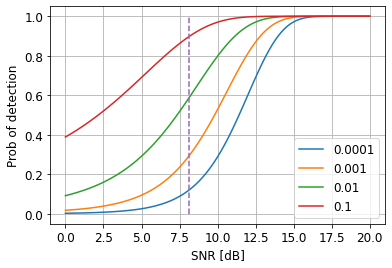

In [8]:
# Coeficiente de discriminación

plt.figure()

P_FA = 10.**np.array([-4,-3,-2,-1])
SNRdB = np.linspace(0,20,101)

for alpha in P_FA:
    SNR = 10**(SNRdB/10)
    T = stats.norm.isf(alpha,loc=0,scale=1)
    P_D = stats.norm.sf(T-np.sqrt(SNR),loc=0,scale=1)
    plt.plot(SNRdB,P_D)

SNRdB_th = 10*np.log10(E/sigma**2)

plt.plot([SNRdB_th,SNRdB_th],[0,1],'--')
plt.grid('on')
plt.xlabel('SNR [dB]')
plt.ylabel('Prob of detection')
plt.legend(P_FA)